In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("Passenger_Satisfaction.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
train_data.drop(columns=["Unnamed: 0","id"], axis=1, inplace=True)

In [4]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## EDA

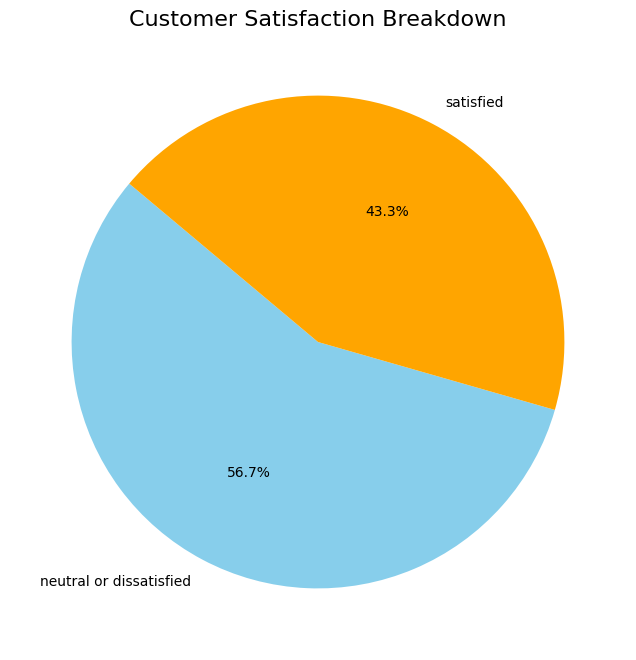

In [5]:
import matplotlib.pyplot as plt

# Count satisfaction levels
satisfaction_counts = train_data['satisfaction'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=140)
plt.title("Customer Satisfaction Breakdown", fontsize=16)
plt.show()


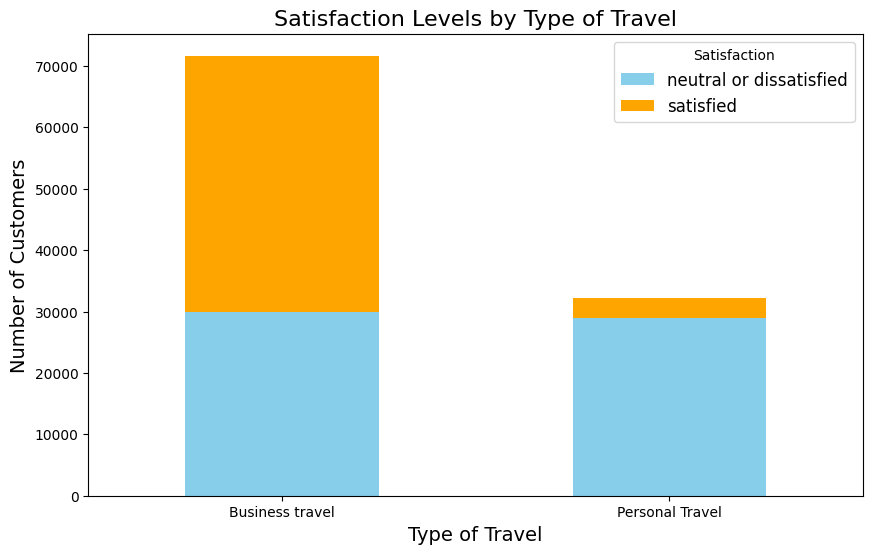

In [6]:
import seaborn as sns

# Group data by Type of Travel and Satisfaction
travel_satisfaction = train_data.groupby(['Type of Travel', 'satisfaction']).size().unstack()

# Plot the bar plot
travel_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Satisfaction Levels by Type of Travel", fontsize=16)
plt.xlabel("Type of Travel", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Satisfaction", fontsize=12)
plt.show()


C:\Users\MANAV\AppData\Local\Temp\ipykernel_11468\3195676587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='satisfaction', y='Flight Distance', data=train_data, palette="Set2")


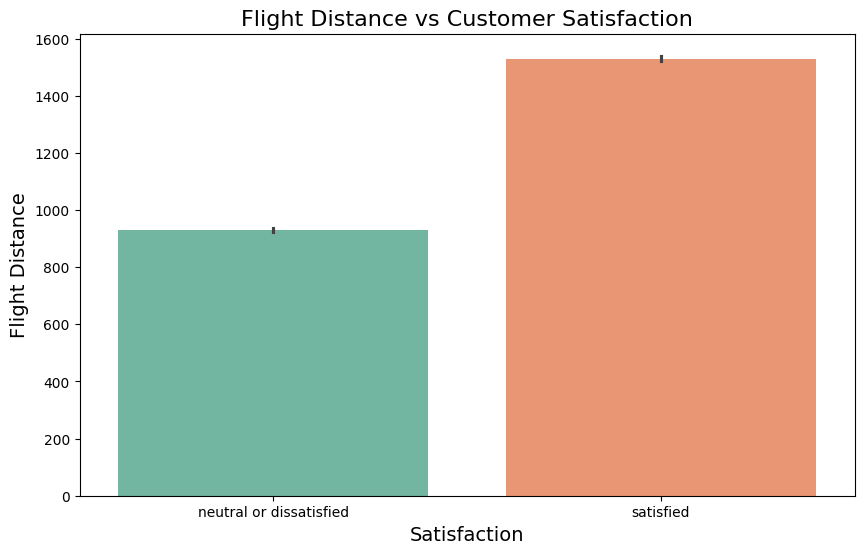

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='satisfaction', y='Flight Distance', data=train_data, palette="Set2")
plt.title("Flight Distance vs Customer Satisfaction", fontsize=16)
plt.xlabel("Satisfaction", fontsize=14)
plt.ylabel("Flight Distance", fontsize=14)
plt.show()


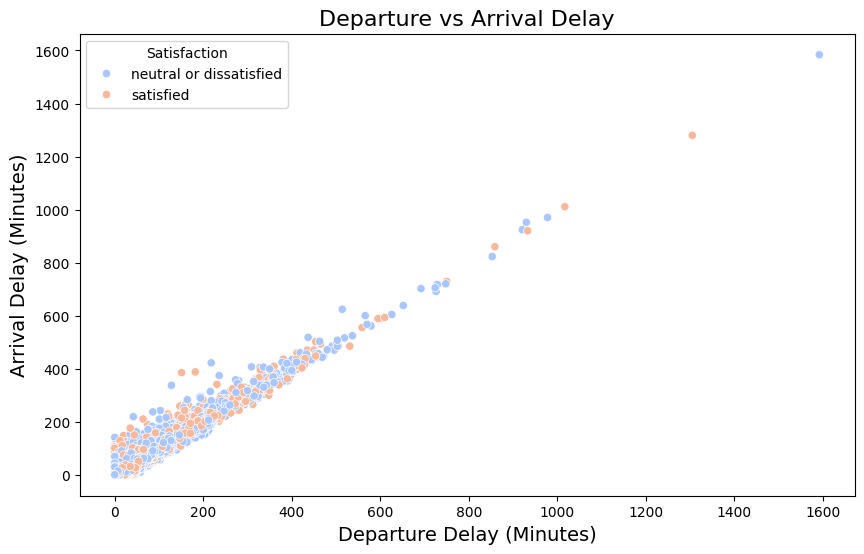

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=train_data, palette="coolwarm")
plt.title("Departure vs Arrival Delay", fontsize=16)
plt.xlabel("Departure Delay (Minutes)", fontsize=14)
plt.ylabel("Arrival Delay (Minutes)", fontsize=14)
plt.legend(title="Satisfaction")
plt.show()


In [6]:
train_data.Gender.replace({"Male":1, "Female":0}, inplace=True)

In [7]:
train_data["Customer Type"].replace({"Loyal Customer":1, "disloyal Customer":0}, inplace=True)

In [8]:
train_data["Type of Travel"].replace({"Personal Travel":1, "Business travel":0}, inplace=True)

In [9]:
train_data = train_data.join(pd.get_dummies(train_data["Class"], drop_first=True, dtype=int, prefix="class"))

In [10]:
train_data.drop(columns=["Class"], axis=1, inplace=True)

In [11]:
train_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
class_Eco                              0
class_Eco Plus                         0
dtype: int64

In [12]:
train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].mean(), inplace=True)

In [13]:
mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
train_data['satisfaction'] = train_data['satisfaction'].map(mapping)


In [14]:
data_train = train_data

In [15]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class_Eco,class_Eco Plus
0,1,1,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,1,0,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,0
2,0,1,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,0,0
3,0,1,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,1,1,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0


In [16]:
import pandas as pd
import numpy as np
test_data = pd.read_csv("Passenger_Satisfaction.csv")
test_data.info()
test_data.drop(columns=["Unnamed: 0","id"], axis=1, inplace=True)
test_data.head()
test_data.Gender.replace({"Male":1, "Female":0}, inplace=True)
test_data["Customer Type"].replace({"Loyal Customer":1, "disloyal Customer":0}, inplace=True)
test_data["Type of Travel"].replace({"Personal Travel":1, "Business travel":0}, inplace=True)
test_data = test_data.join(pd.get_dummies(test_data["Class"], drop_first=True, dtype=int, prefix="class"))
test_data.drop(columns=["Class"], axis=1, inplace=True)
test_data.isnull().sum()
test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].mean(), inplace=True)
mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
test_data['satisfaction'] = test_data['satisfaction'].map(mapping)
data_test = test_data
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class_Eco,class_Eco Plus
0,1,1,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0,1
1,1,0,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0,0
2,0,1,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,0,0
3,0,1,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,0,0
4,1,1,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0,0


In [17]:
data_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'class_Eco', 'class_Eco Plus'],
      dtype='object')

In [18]:
X = data_train.loc[:,['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
        'class_Eco', 'class_Eco Plus']]

In [19]:
y = data_train.iloc[:,-3]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

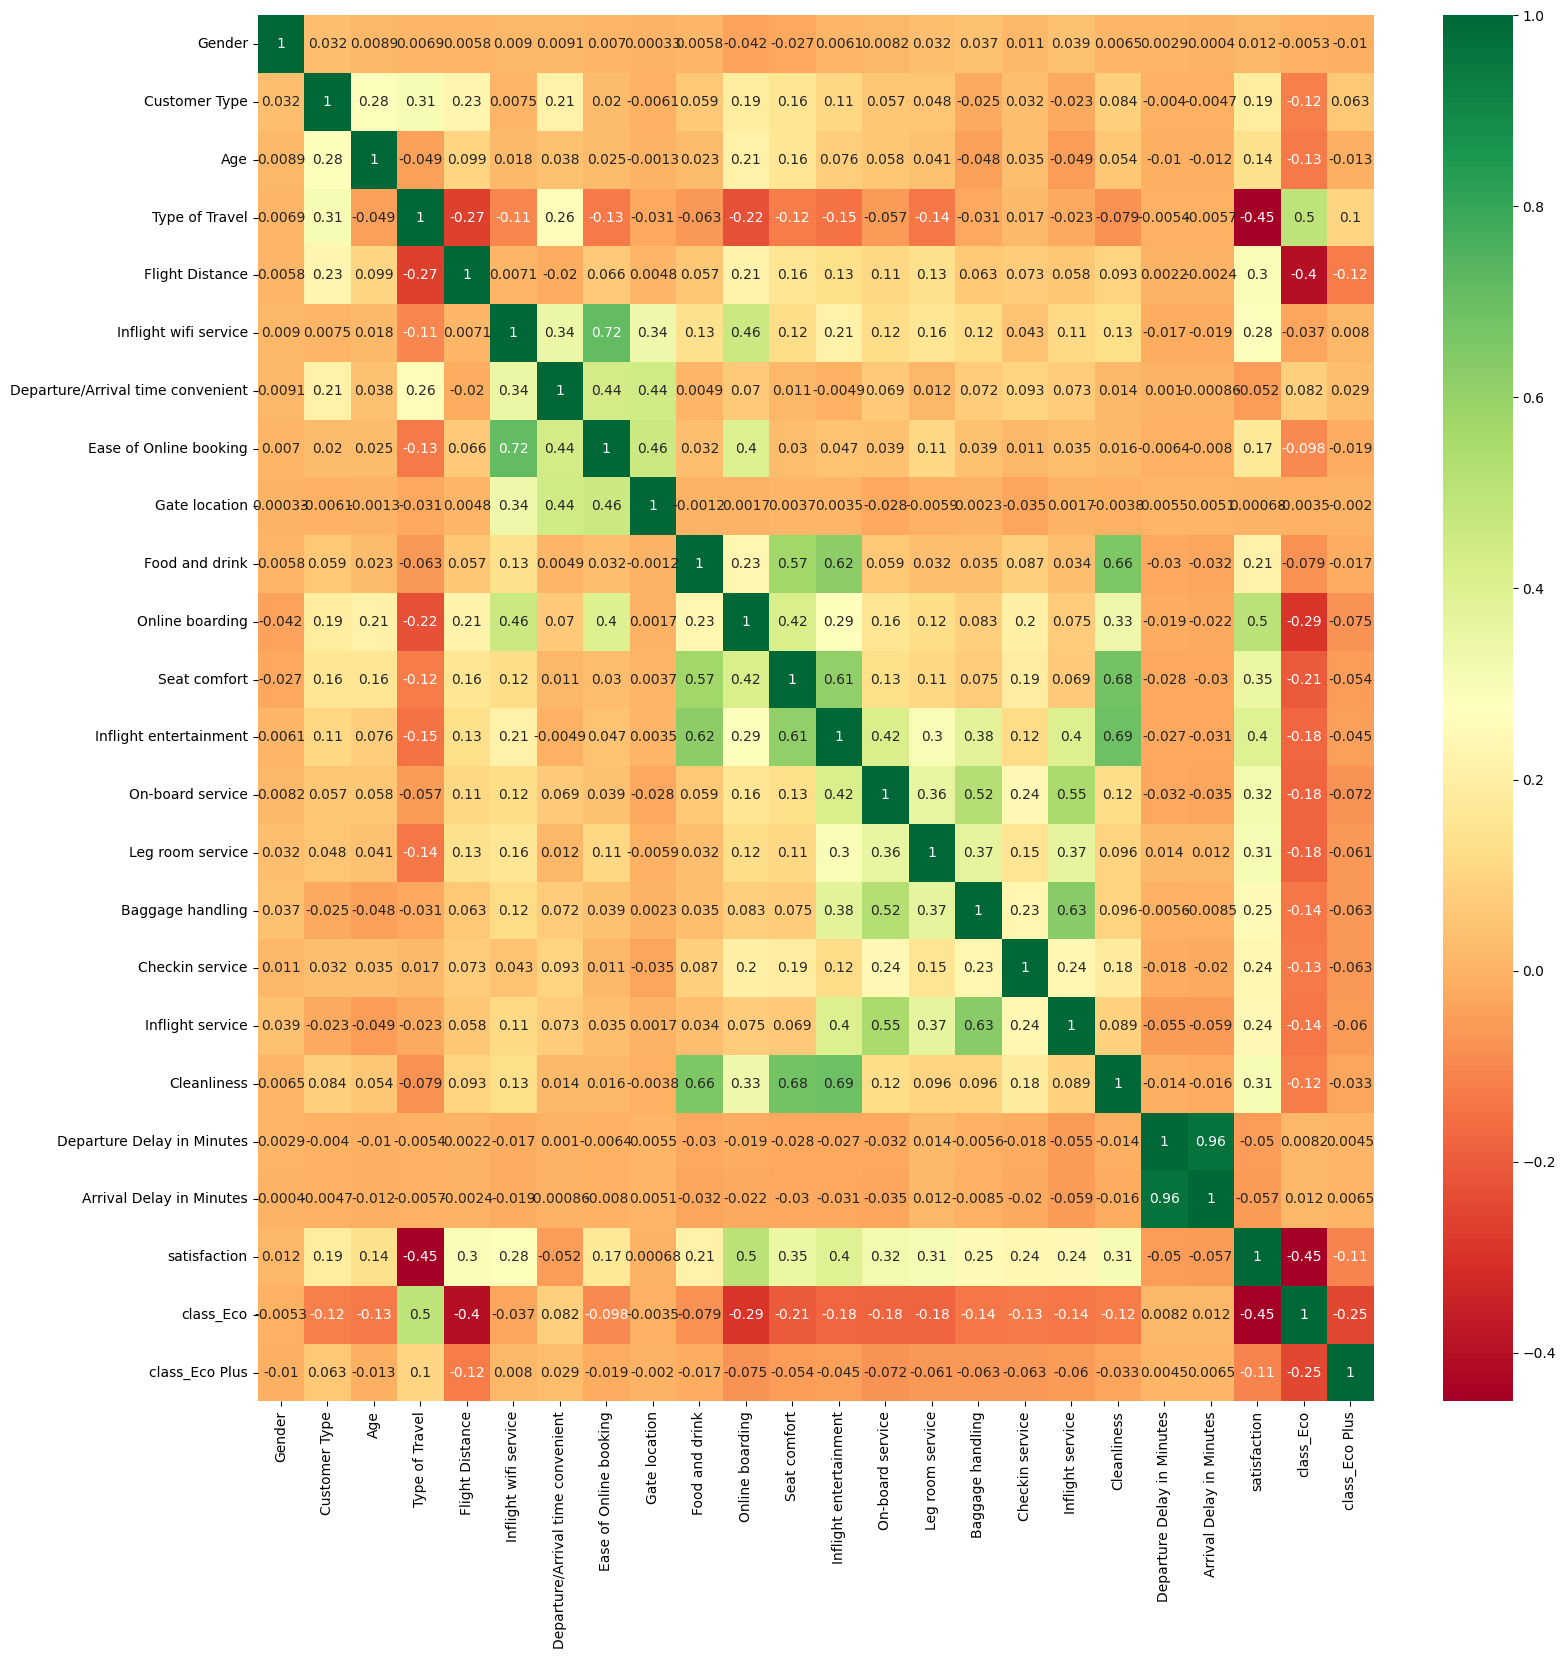

In [20]:
# Finds correlation between Independent and dependent attributes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

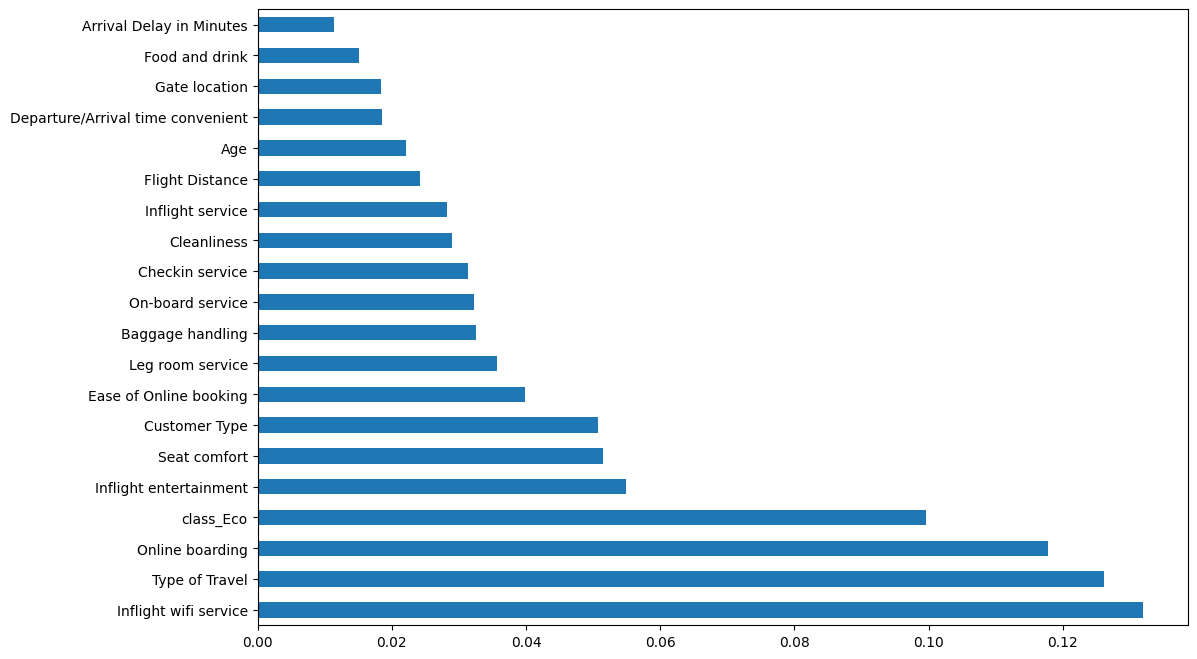

In [22]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

reg_cl = RandomForestClassifier(n_estimators=501)
reg_cl.fit(X_train, y_train)

RandomForestClassifier(n_estimators=501)

In [25]:
reg_cl.score(X_train, y_train)

1.0

In [26]:
reg_cl.score(X_test, y_test)

0.9615359938406262

In [27]:
ytrain_predict = reg_cl.predict(X_train)
ytest_predict = reg_cl.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
confusion_matrix(y_train,ytrain_predict)

array([[41324,     0],
       [    0, 31408]], dtype=int64)

In [30]:
confusion_matrix(y_test,ytest_predict)

array([[17181,   374],
       [  825, 12792]], dtype=int64)

In [31]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41324
           1       1.00      1.00      1.00     31408

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732



In [32]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



In [33]:
data_train["satisfaction"].value_counts(normalize=True)

satisfaction
0    0.566667
1    0.433333
Name: proportion, dtype: float64

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_lr = LogisticRegression()

In [38]:
model_lr.fit(X_train,y_train)

c:\Users\MANAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
trainpredict=model_lr.predict(X_train)

In [40]:
testpredict=model_lr.predict(X_test)

In [41]:
model_lr.score(X_train, y_train)

0.8021366111202772

In [42]:
model_lr.score(X_test, y_test)

0.802611317849352

In [43]:
from sklearn import metrics

metrics.confusion_matrix(y_train,trainpredict)

array([[33015,  8309],
       [ 6082, 25326]], dtype=int64)

In [44]:
metrics.confusion_matrix(y_test,testpredict)

array([[13990,  3565],
       [ 2588, 11029]], dtype=int64)

In [45]:
print(metrics.classification_report(y_train,trainpredict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     41324
           1       0.75      0.81      0.78     31408

    accuracy                           0.80     72732
   macro avg       0.80      0.80      0.80     72732
weighted avg       0.80      0.80      0.80     72732



In [46]:
print(metrics.classification_report(y_test,testpredict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     17555
           1       0.76      0.81      0.78     13617

    accuracy                           0.80     31172
   macro avg       0.80      0.80      0.80     31172
weighted avg       0.81      0.80      0.80     31172



## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [48]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [49]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41324
           1       1.00      1.00      1.00     31408

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732



In [55]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17555
           1       0.94      0.94      0.94     13617

    accuracy                           0.95     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.95      0.95      0.95     31172



In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid={
    'max_depth': [4,5,6,7],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [10,20,30,40],
    'max_features':[14,15,16,17],
    'criterion':['gini','entropy']
}

grid_search=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': [14, 15, 16, 17],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [10, 20, 30, 40]},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 30}

In [61]:
ytrain_predict = grid_search.predict(X_train)
ytest_predict = grid_search.predict(X_test)

In [62]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     41324
           1       0.94      0.88      0.91     31408

    accuracy                           0.92     72732
   macro avg       0.92      0.92      0.92     72732
weighted avg       0.92      0.92      0.92     72732



In [63]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     17555
           1       0.93      0.88      0.91     13617

    accuracy                           0.92     31172
   macro avg       0.92      0.92      0.92     31172
weighted avg       0.92      0.92      0.92     31172



## Naive Bayes Model

In [64]:
# Import Naive Bayes library and Metrics to build the model, confusion metrics and classification report

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [65]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [66]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8608590441621294
[[37086  4238]
 [ 5882 25526]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     41324
           1       0.86      0.81      0.83     31408

    accuracy                           0.86     72732
   macro avg       0.86      0.86      0.86     72732
weighted avg       0.86      0.86      0.86     72732



In [67]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8609649685615296
[[15773  1782]
 [ 2552 11065]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     17555
           1       0.86      0.81      0.84     13617

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172



## KNN

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [69]:
XScaled  = X.apply(zscore)   # convert all attributes to Z scale

In [70]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [71]:
predicted_labels_train = NNH.predict(X_train)
NNH.score(X_train, y_train)

1.0

In [72]:
predicted_labels_test = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7415629411009881

In [73]:
metrics.confusion_matrix(y_train,predicted_labels_train)

array([[41324,     0],
       [    0, 31408]], dtype=int64)

In [74]:
metrics.confusion_matrix(y_test,predicted_labels_test)

array([[14109,  3446],
       [ 4610,  9007]], dtype=int64)

In [79]:
print(metrics.classification_report(y_train,predicted_labels_train,digits=3))
print("-------------------------------------------------------")
print(metrics.classification_report(y_test,predicted_labels_test,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     41324
           1      1.000     1.000     1.000     31408

    accuracy                          1.000     72732
   macro avg      1.000     1.000     1.000     72732
weighted avg      1.000     1.000     1.000     72732

-------------------------------------------------------
              precision    recall  f1-score   support

           0      0.754     0.804     0.778     17555
           1      0.723     0.661     0.691     13617

    accuracy                          0.742     31172
   macro avg      0.739     0.733     0.734     31172
weighted avg      0.740     0.742     0.740     31172



## Gradient Boosting

In [80]:
# import GB and build the model on training data

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [83]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("Train : ",model_score)
print("Train : ",metrics.confusion_matrix(y_train, y_train_predict))
print("Train : ",metrics.classification_report(y_train, y_train_predict))

Train :  0.9407413518121323
Train :  [[39605  1719]
 [ 2591 28817]]
Train :                precision    recall  f1-score   support

           0       0.94      0.96      0.95     41324
           1       0.94      0.92      0.93     31408

    accuracy                           0.94     72732
   macro avg       0.94      0.94      0.94     72732
weighted avg       0.94      0.94      0.94     72732



In [84]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("Test : ",model_score)
print("Test : ",metrics.confusion_matrix(y_test, y_test_predict))
print("Test : ",metrics.classification_report(y_test, y_test_predict))

Test :  0.9400744257667137
Test :  [[16818   737]
 [ 1131 12486]]
Test :                precision    recall  f1-score   support

           0       0.94      0.96      0.95     17555
           1       0.94      0.92      0.93     13617

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



In [34]:
import pickle

# Save the fully trained model
with open('Customer_Satisfaction.pkl', 'wb') as file:
    pickle.dump(reg_cl, file)

## MLflow

In [88]:
import mlflow

In [90]:
mlflow.set_experiment("2nd_Passenger_satisfaction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

2025/01/28 15:32:35 INFO mlflow.tracking.fluent: Experiment with name '2nd_Passenger_satisfaction' does not exist. Creating a new experiment.


## Logistic_Regression

In [92]:
# Start an MLflow experiment
with mlflow.start_run(run_name="Logistic_Regression"):
    # Define the model
    model_lr = LogisticRegression()
    
    # Fit the model
    model_lr.fit(X_train, y_train)
    
    # Predictions
    trainpredict = model_lr.predict(X_train)
    testpredict = model_lr.predict(X_test)
    
    # Calculate metrics
    train_accuracy = model_lr.score(X_train, y_train)
    test_accuracy = model_lr.score(X_test, y_test)
    
    train_conf_matrix = metrics.confusion_matrix(y_train, trainpredict)
    test_conf_matrix = metrics.confusion_matrix(y_test, testpredict)
    
    train_class_report = metrics.classification_report(y_train, trainpredict, output_dict=True)
    test_class_report = metrics.classification_report(y_test, testpredict, output_dict=True)
    
    # Log metrics
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    mlflow.log_metric("train_precision", train_class_report["weighted avg"]["precision"])
    mlflow.log_metric("test_precision", test_class_report["weighted avg"]["precision"])
    mlflow.log_metric("train_recall", train_class_report["weighted avg"]["recall"])
    mlflow.log_metric("test_recall", test_class_report["weighted avg"]["recall"])
    mlflow.log_metric("train_f1", train_class_report["weighted avg"]["f1-score"])
    mlflow.log_metric("test_f1", test_class_report["weighted avg"]["f1-score"])
    
    # Log confusion matrix as artifacts
    np.savetxt("train_confusion_matrix.csv", train_conf_matrix, delimiter=",")
    np.savetxt("test_confusion_matrix.csv", test_conf_matrix, delimiter=",")
    mlflow.log_artifact("train_confusion_matrix.csv")
    mlflow.log_artifact("test_confusion_matrix.csv")
    
    # Log the model
    mlflow.sklearn.log_model(model_lr, "Logistic_Regression_Model")

c:\Users\MANAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/01/28 15:35:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic_Regression at: http://127.0.0.1:5000/#/experiments/344912781601375105/runs/7f48db3d463541e5aebe1170da334139
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105


## Random_Forest_Classifier

In [ ]:
with mlflow.start_run(run_name="Random_Forest_Classifier"):
    # Define the model
    reg_cl = RandomForestClassifier(n_estimators=501)
    
    # Log model parameters
    mlflow.log_param("n_estimators", reg_cl.n_estimators)
    mlflow.log_param("criterion", reg_cl.criterion)
    mlflow.log_param("max_depth", reg_cl.max_depth)
    mlflow.log_param("random_state", reg_cl.random_state)
    
    # Fit the model
    reg_cl.fit(X_train, y_train)
    
    # Train and test scores
    train_score = reg_cl.score(X_train, y_train)
    test_score = reg_cl.score(X_test, y_test)
    
    # Log metrics
    mlflow.log_metric("train_accuracy", train_score)
    mlflow.log_metric("test_accuracy", test_score)
    
    # Predictions
    ytrain_predict = reg_cl.predict(X_train)
    ytest_predict = reg_cl.predict(X_test)
    
    # Confusion matrices
    train_conf_matrix = confusion_matrix(y_train, ytrain_predict)
    test_conf_matrix = confusion_matrix(y_test, ytest_predict)
    
    # Classification reports
    train_class_report = classification_report(y_train, ytrain_predict, output_dict=True)
    test_class_report = classification_report(y_test, ytest_predict, output_dict=True)
    
    # Log additional metrics
    mlflow.log_metric("train_precision", train_class_report["weighted avg"]["precision"])
    mlflow.log_metric("test_precision", test_class_report["weighted avg"]["precision"])
    mlflow.log_metric("train_recall", train_class_report["weighted avg"]["recall"])
    mlflow.log_metric("test_recall", test_class_report["weighted avg"]["recall"])
    mlflow.log_metric("train_f1", train_class_report["weighted avg"]["f1-score"])
    mlflow.log_metric("test_f1", test_class_report["weighted avg"]["f1-score"])

    mlflow.sklearn.log_model(reg_cl, "Random_Forest_Model")

2025/01/28 17:08:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random_Forest_Classifier1 at: http://127.0.0.1:5000/#/experiments/344912781601375105/runs/e94e954a1a9d4337b3a088c4460cdc70
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105


## Decision Tree Classifier

In [95]:
with mlflow.start_run(run_name="Decision_Tree_Classifier"):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'max_depth': [4, 5, 6, 7],
        'min_samples_leaf': [1, 2, 3, 4],
        'min_samples_split': [10, 20, 30, 40],
        'max_features': [14, 15, 16, 17],
        'criterion': ['gini', 'entropy']
    }

    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Log best parameters
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)

    # Train and test scores
    train_score = grid_search.score(X_train, y_train)
    test_score = grid_search.score(X_test, y_test)

    # Log metrics
    mlflow.log_metric("train_accuracy", train_score)
    mlflow.log_metric("test_accuracy", test_score)

    # Predictions
    ytrain_predict = grid_search.predict(X_train)
    ytest_predict = grid_search.predict(X_test)

    # Confusion matrices
    train_conf_matrix = confusion_matrix(y_train, ytrain_predict)
    test_conf_matrix = confusion_matrix(y_test, ytest_predict)

    # Classification reports
    train_class_report = classification_report(y_train, ytrain_predict, output_dict=True)
    test_class_report = classification_report(y_test, ytest_predict, output_dict=True)

    # Log additional metrics
    mlflow.log_metric("train_precision", train_class_report["weighted avg"]["precision"])
    mlflow.log_metric("test_precision", test_class_report["weighted avg"]["precision"])
    mlflow.log_metric("train_recall", train_class_report["weighted avg"]["recall"])
    mlflow.log_metric("test_recall", test_class_report["weighted avg"]["recall"])
    mlflow.log_metric("train_f1", train_class_report["weighted avg"]["f1-score"])
    mlflow.log_metric("test_f1", test_class_report["weighted avg"]["f1-score"])

    # Log the best model
    mlflow.sklearn.log_model(grid_search.best_estimator_, "Decision_Tree_Best_Model")

2025/01/28 17:26:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision_Tree_Classifier at: http://127.0.0.1:5000/#/experiments/344912781601375105/runs/573959cb585c4e9294bf7246ee45b541
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105


## GaussianNB_Experiment

In [96]:
with mlflow.start_run(run_name="GaussianNB_Experiment"):
    # Instantiate and fit the model
    NB_model = GaussianNB()
    NB_model.fit(X_train, y_train)

    # Train set predictions and metrics
    y_train_predict = NB_model.predict(X_train)
    train_score = NB_model.score(X_train, y_train)
    train_conf_matrix = confusion_matrix(y_train, y_train_predict)
    train_class_report = classification_report(y_train, y_train_predict, output_dict=True)

    # Test set predictions and metrics
    y_test_predict = NB_model.predict(X_test)
    test_score = NB_model.score(X_test, y_test)
    test_conf_matrix = confusion_matrix(y_test, y_test_predict)
    test_class_report = classification_report(y_test, y_test_predict, output_dict=True)

    # Log parameters (if any) and metrics
    mlflow.log_metric("train_accuracy", train_score)
    mlflow.log_metric("test_accuracy", test_score)
    mlflow.log_metric("train_precision", train_class_report["weighted avg"]["precision"])
    mlflow.log_metric("test_precision", test_class_report["weighted avg"]["precision"])
    mlflow.log_metric("train_recall", train_class_report["weighted avg"]["recall"])
    mlflow.log_metric("test_recall", test_class_report["weighted avg"]["recall"])
    mlflow.log_metric("train_f1", train_class_report["weighted avg"]["f1-score"])
    mlflow.log_metric("test_f1", test_class_report["weighted avg"]["f1-score"])

    # Log the model
    mlflow.sklearn.log_model(NB_model, "GaussianNB_Model")

2025/01/28 17:54:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB_Experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105/runs/ae0be7657c734b3c9a16b80e594b7099
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105


## KNN


In [97]:
# Z-scale transformation of features
XScaled = X.apply(zscore)

with mlflow.start_run(run_name="KNN"):
    # Model parameters
    n_neighbors = 5
    weights = 'distance'

    # Log parameters to MLflow
    mlflow.log_param("n_neighbors", n_neighbors)
    mlflow.log_param("weights", weights)

    # Initialize and fit the model
    NNH = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    NNH.fit(X_train, y_train)

    # Train set predictions and metrics
    predicted_labels_train = NNH.predict(X_train)
    train_score = NNH.score(X_train, y_train)
    train_conf_matrix = confusion_matrix(y_train, predicted_labels_train)
    train_class_report = classification_report(y_train, predicted_labels_train, digits=3, output_dict=True)

    # Test set predictions and metrics
    predicted_labels_test = NNH.predict(X_test)
    test_score = NNH.score(X_test, y_test)
    test_conf_matrix = confusion_matrix(y_test, predicted_labels_test)
    test_class_report = classification_report(y_test, predicted_labels_test, digits=3, output_dict=True)

    # Log metrics to MLflow
    mlflow.log_metric("train_accuracy", train_score)
    mlflow.log_metric("test_accuracy", test_score)
    mlflow.log_metric("train_precision", train_class_report["weighted avg"]["precision"])
    mlflow.log_metric("test_precision", test_class_report["weighted avg"]["precision"])
    mlflow.log_metric("train_recall", train_class_report["weighted avg"]["recall"])
    mlflow.log_metric("test_recall", test_class_report["weighted avg"]["recall"])
    mlflow.log_metric("train_f1", train_class_report["weighted avg"]["f1-score"])
    mlflow.log_metric("test_f1", test_class_report["weighted avg"]["f1-score"])

    # Log the model to MLflow
    mlflow.sklearn.log_model(NNH, "KNN_Model")

2025/01/28 17:57:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/344912781601375105/runs/b3f0d34d0a634c3a8979f101b44d5288
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/344912781601375105
